# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
path="/content/drive/MyDrive/Python Class/foodhub_order.csv"
df=pd.read_csv(path)

In [ ]:
# returns the first 5 rows

# check data content and structure, by returning first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Shape function to see the total number of rows and columns

# to get dimensions of the DataFrame, number of rows and columns
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame

# to get a summary of the DataFrame including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   All 9 columns have non-null/missing values

*   The data types of the columns are as follows Four integer columns('order_id','customer_id','food_preparation_time','delivery time"), One float column('cost_of_the_order'), Four object columns('restaurant_name','cuisine_type', 'day_of_the_week','ratings')

*   The column ('rating') shows up as data type Object, perhaps due to the presence of non-numerical data, these columns needs to be converted to data type integer.
























### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Check for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

*   There are no missing values in any of the columns in the dataset





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# checking to see if there are any duplicate values
df.duplicated().sum()

0

#### Observations:

*   There are no duplicate values in the dataset




In [ ]:
# summary statistics for the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# summary of non-numerical data
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:


*   Cost of the order: This ranges from 4.47 to 35.41 with an average order cost of 16.49 and a standard deviation of 7.48, 75% of the orders are less than 22.29 dollars, which means about 25% of customers ordered food that was greater than 22.29 dollars

*   Food preparation time: This varies from 20 to 35 minutes. The average food preparation time was approximately 27.37 minutes. 25% of the food preparation time took over 31 minutes.

*   Delivery time: on average the delivery time was about 24 minutes, with a standard deviation of 4.97 minutes. Most of the deliveries took about 28 minutes or less.

*   The ratings category is missing from these statistics, as it contained about 39% "Not given". A decision was made to ignore this due to the high frequency of "Not given", to prevent skewing the data.

*  The non-numerical data, shows that there are 1898 entries, of which there are 178 unique restaurants, 14 unique cuisine types. Among the restaurants, Shake Shack has the highest order frequency and most frequent cuisine type is American.










### **Question 5:** How many orders are not rated?

In [ ]:
# finding the count of all ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# finding the ratings percentage
value_counts = df['rating'].value_counts()
percentage = (value_counts / df.shape[0])*100
round(percentage,2)

Not given    38.78
5            30.98
4            20.34
3             9.91
Name: rating, dtype: float64

In [ ]:
value_counts = df['rating'].value_counts()
percentage_of_5 = (value_counts.get(5, 0) / df.shape[0]) * 100
print("Percentage of ratings that are 5:", round(percentage_of_5, 2))

Percentage of ratings that are 5: 0.0


#### Observations:

*   There are 736 which is approximately 39% that are not rated.









### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

In [ ]:
# graphs to show all the variables

## Top 5 customer id

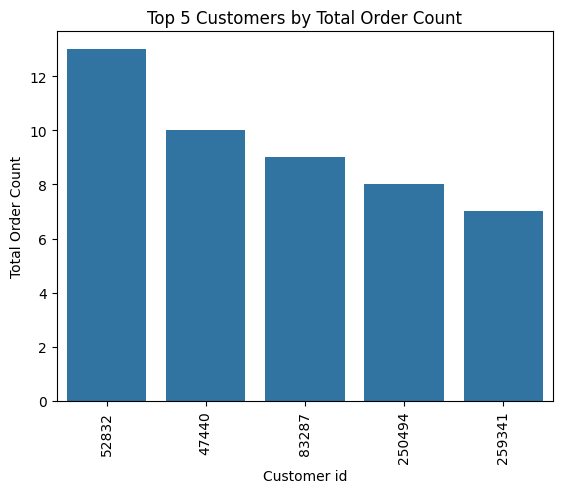

In [ ]:
sns.countplot(data=df, x ='customer_id', order=df['customer_id'].value_counts().index[:5])
plt.xticks(rotation=90)
plt.title('Top 5 Customers by Total Order Count')
plt.xlabel('Customer id')
plt.ylabel('Total Order Count')
plt.show()

In [ ]:
customer_ids = [52832, 47440, 83287, 250494, 259341]

orders_counts = {}

# Loop through each customer ID and calculate the count of orders
for customer_id in customer_ids:
    orders_counts[customer_id] = df[df['customer_id'] == customer_id]['order_id'].count()

# Print the counts for each customer ID
for customer_id, count in orders_counts.items():
    print('Customer ID ' + str(customer_id) + ": " + str(count) +  ' orders')



Customer ID 52832: 13 orders
Customer ID 47440: 10 orders
Customer ID 83287: 9 orders
Customer ID 250494: 8 orders
Customer ID 259341: 7 orders


#### Observations:

Cuctomer_id 52832 has the most orders, with a total of 13. The top 5 customers all had orders of 7 or more

## Cuisine Type

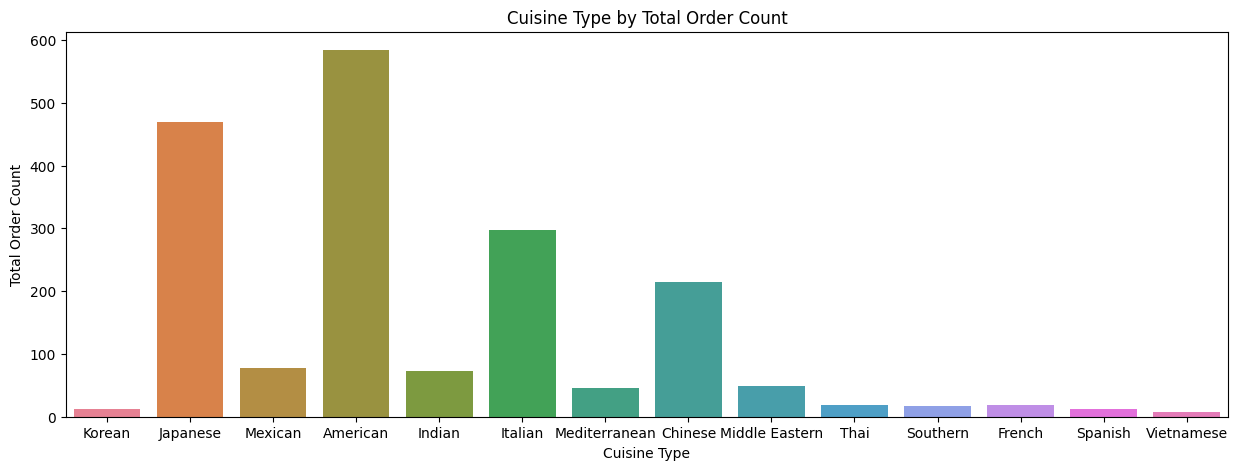

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type')
plt.title('Cuisine Type by Total Order Count')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Order Count')
plt.show();


#### Observations:

*   The top 3 ordered cuisine types are American, Japanese and Italian
*   The least ordered cuisine types are Vietnamese, Korean and Spanish



## Restaurant name

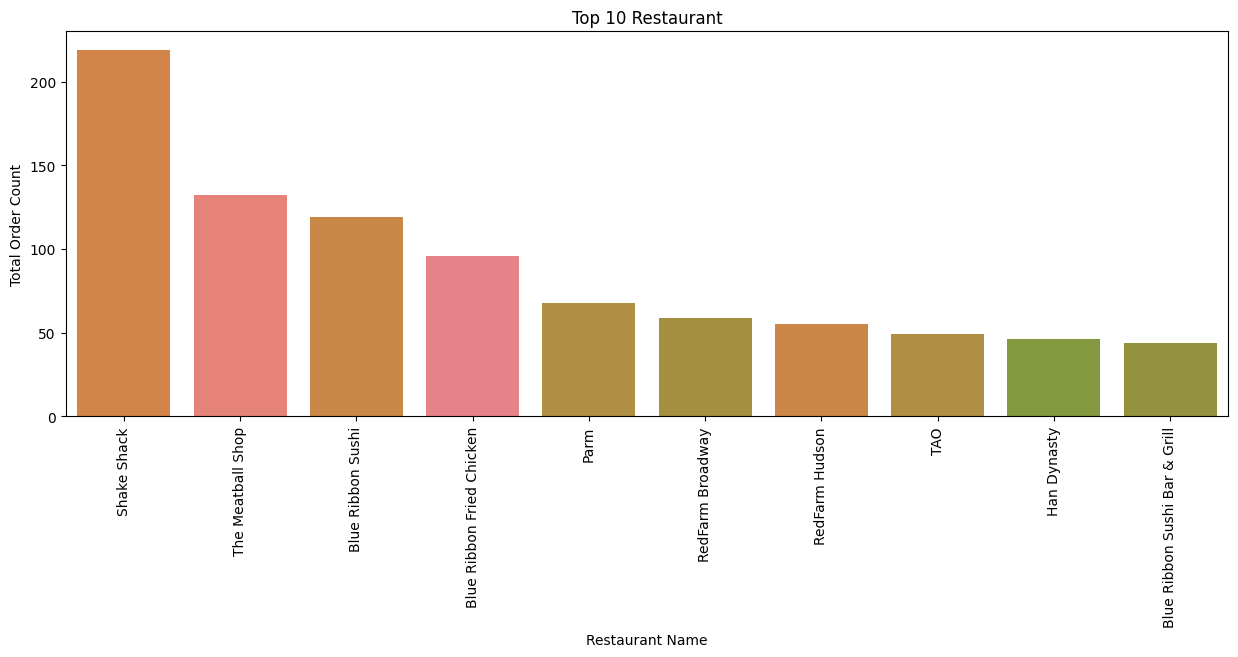

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='restaurant_name', hue = 'restaurant_name', order=df['restaurant_name'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Order Count')
plt.show();


#### Observations:

*   Customers ordered from Shake Shack the most




## Cost of The Order

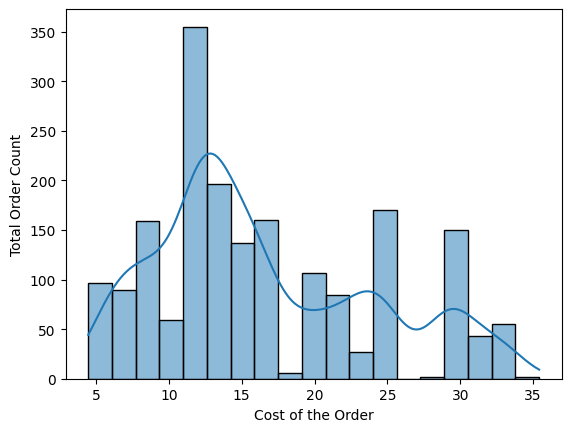

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.xlabel('Cost of the Order')
plt.ylabel('Total Order Count')
plt.show();


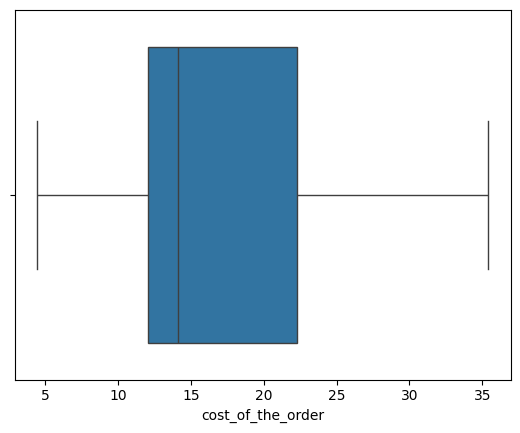

In [ ]:
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

#### Observations:


*   The histogram shows that the highest frequency of food order is about 11-12 dollars

*   The median order cost is about 14 dollars

*   The box plot shows a right-skewed distribution with no outliers, this suggests that the mean exceeds the median, indicating a few high-cost orders are driving this trend.








## Day of the Week

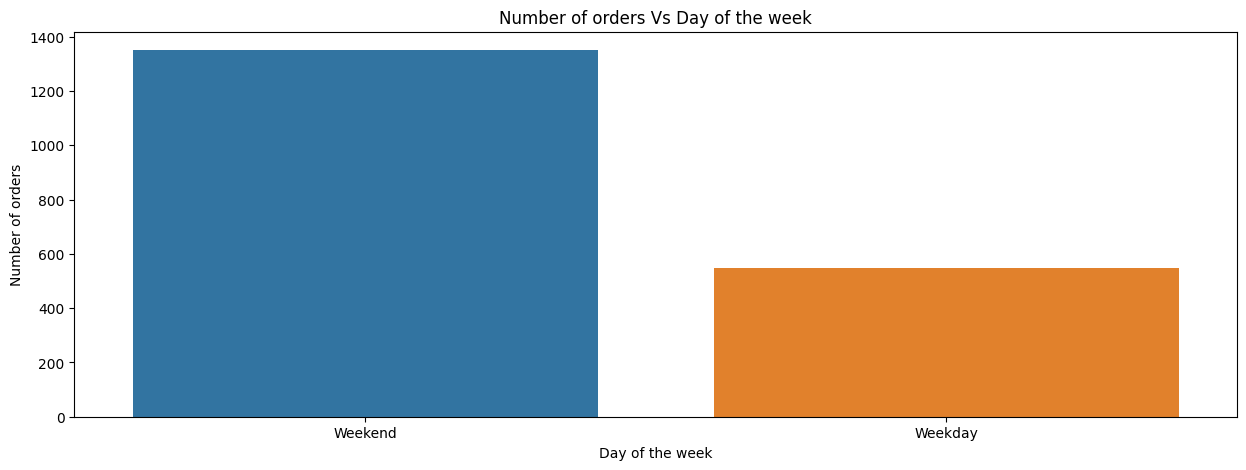

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x ='day_of_the_week', hue = 'day_of_the_week')
plt.title('Number of orders Vs Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.show();

In [ ]:
# calculate percentage breakdown of weekday vs weekend
day_of_week_count = df['day_of_the_week'].value_counts()
percentage = (day_of_week_count / df.shape[0])*100
round(percentage,2)

Weekend    71.18
Weekday    28.82
Name: day_of_the_week, dtype: float64

#### Observations:

*   Majority of the orders placed were on the weekend

*   Approximately 71% of orders were placed on the weekend and 29% were placed on a weekday







## Rating

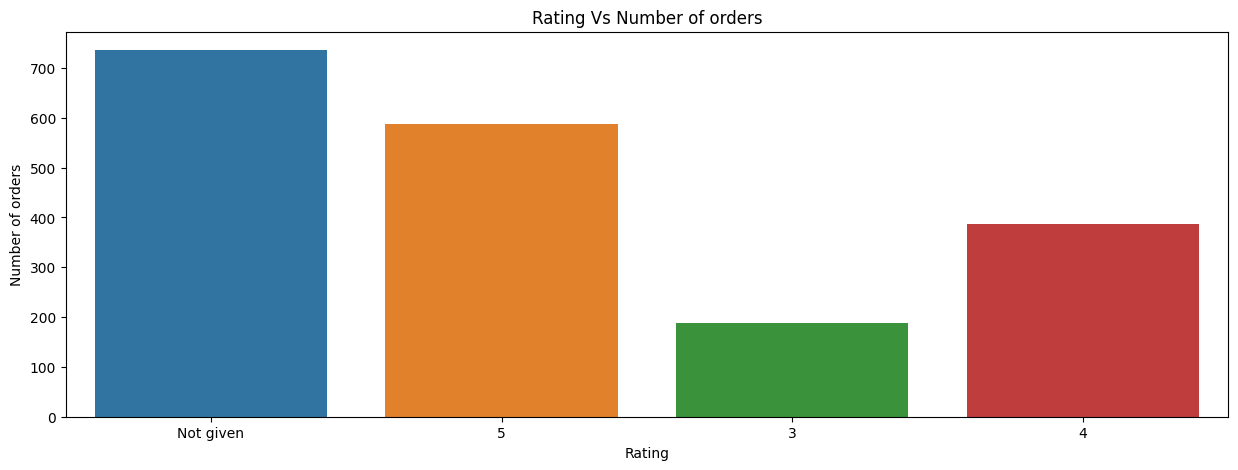

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='rating', hue = 'rating')
plt.title('Rating Vs Number of orders')
plt.xlabel('Rating')
plt.ylabel('Number of orders')
plt.show();

#### Observations:

*   There were 736 rating that were Not given. Of the ratings provided, the majority were 5, indicating high levels of customer satisfaction.






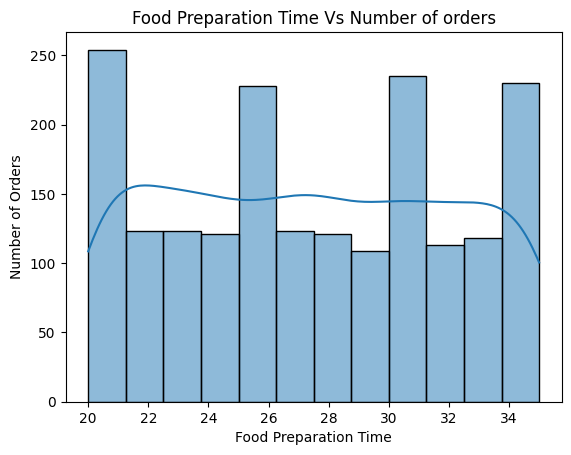

In [ ]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title('Food Preparation Time Vs Number of orders')
plt.xlabel('Food Preparation Time')
plt.ylabel('Number of Orders')
plt.show();

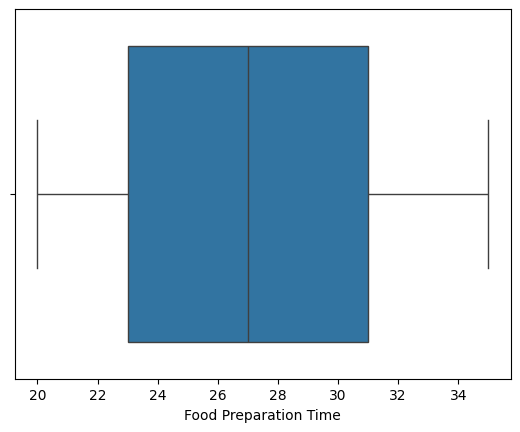

In [ ]:
sns.boxplot(data=df, x='food_preparation_time')
plt.xlabel('Food Preparation Time')
plt.show();

#### Observations:

*   The food preparation time is evenly distributed between 20 - 35 minutes.
*   The median food prepapration time is approximately 27 minutes



## Delivery time

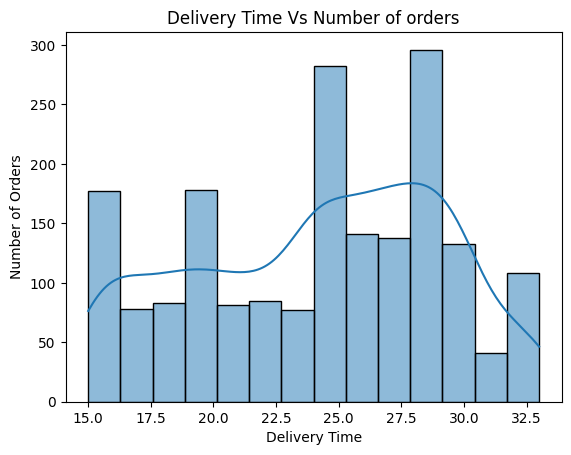

In [ ]:
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title('Delivery Time Vs Number of orders')
plt.xlabel('Delivery Time')
plt.ylabel('Number of Orders')
plt.show();

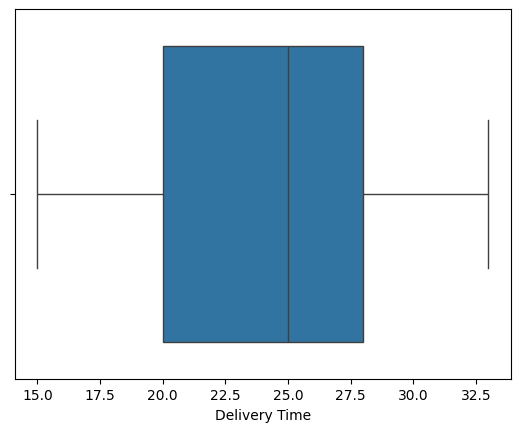

In [ ]:
sns.boxplot(data=df, x='delivery_time')
plt.xlabel('Delivery Time')
plt.show();

#### Observations:

*   There are no outliers

*   Most orders have a delivery time between 24 and 30 minutes. With the time frame around 28 minutes being the most common. Delivery times significantly faster or slower than this window are less frequent.





### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Top 5 restaurants with the highest number of orders

df['restaurant_name'].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

*   Shake Shack with 219 orders has the highest order count, indicating most popular amongst the customers.

*   The meat ball shop comes in second with a lower order count compared to shake Shack but still a substantial figure.

*   Blue Ribbon Sushi comes in at third which is still a high amount of orders, suggesting it is also a customer favorite.

*   Blue Ribbon Fried Chicken and Parm each are below 100 order count, shows a slight lower performance when compared to the top 3 restaurants.








### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Most popular cuisine on Weekends
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:

The most popular cusine on the Weekend is the American cuisine

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# percentage of the orders that cost more than 20 dollars

order_count = df[df['cost_of_the_order']>20]
percentage = (order_count.shape[0] / df.shape[0])*100
print('There are a total of:', order_count.shape[0], 'orders costing more than 20 dollars, which is approximately:', round(percentage), '%', 'of total orders')

There are a total of: 555 orders costing more than 20 dollars, which is approximately: 29 % of total orders


#### Observations:

*   There are a total of 555 orders that cost more than $20

*   The percentage of orders above $20 is approximately 29%



### **Question 10**: What is the mean order delivery time?

In [ ]:
# The mean order delivery time

round(df['delivery_time'].mean(),2)

24.16

#### Observations:

The average delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Top 5 customers

df['customer_id'].value_counts().nlargest(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:

*  The top 5 most frequent customers that would receive the 20% are customer_id 52832,47440,83287, 250494 and 259341. With customer id 52832 being the most frequent customer.






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


<ipython-input-34-b547eaa8dce0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


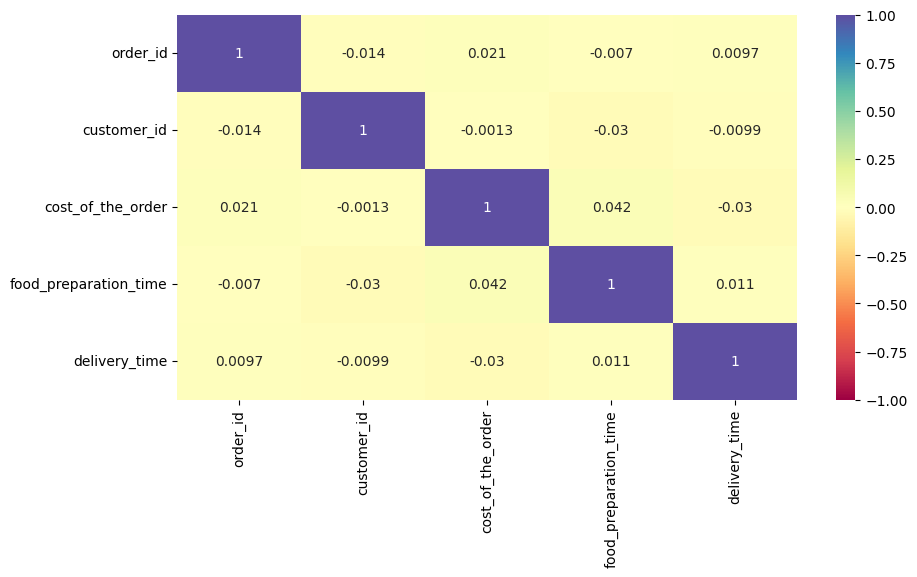

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()


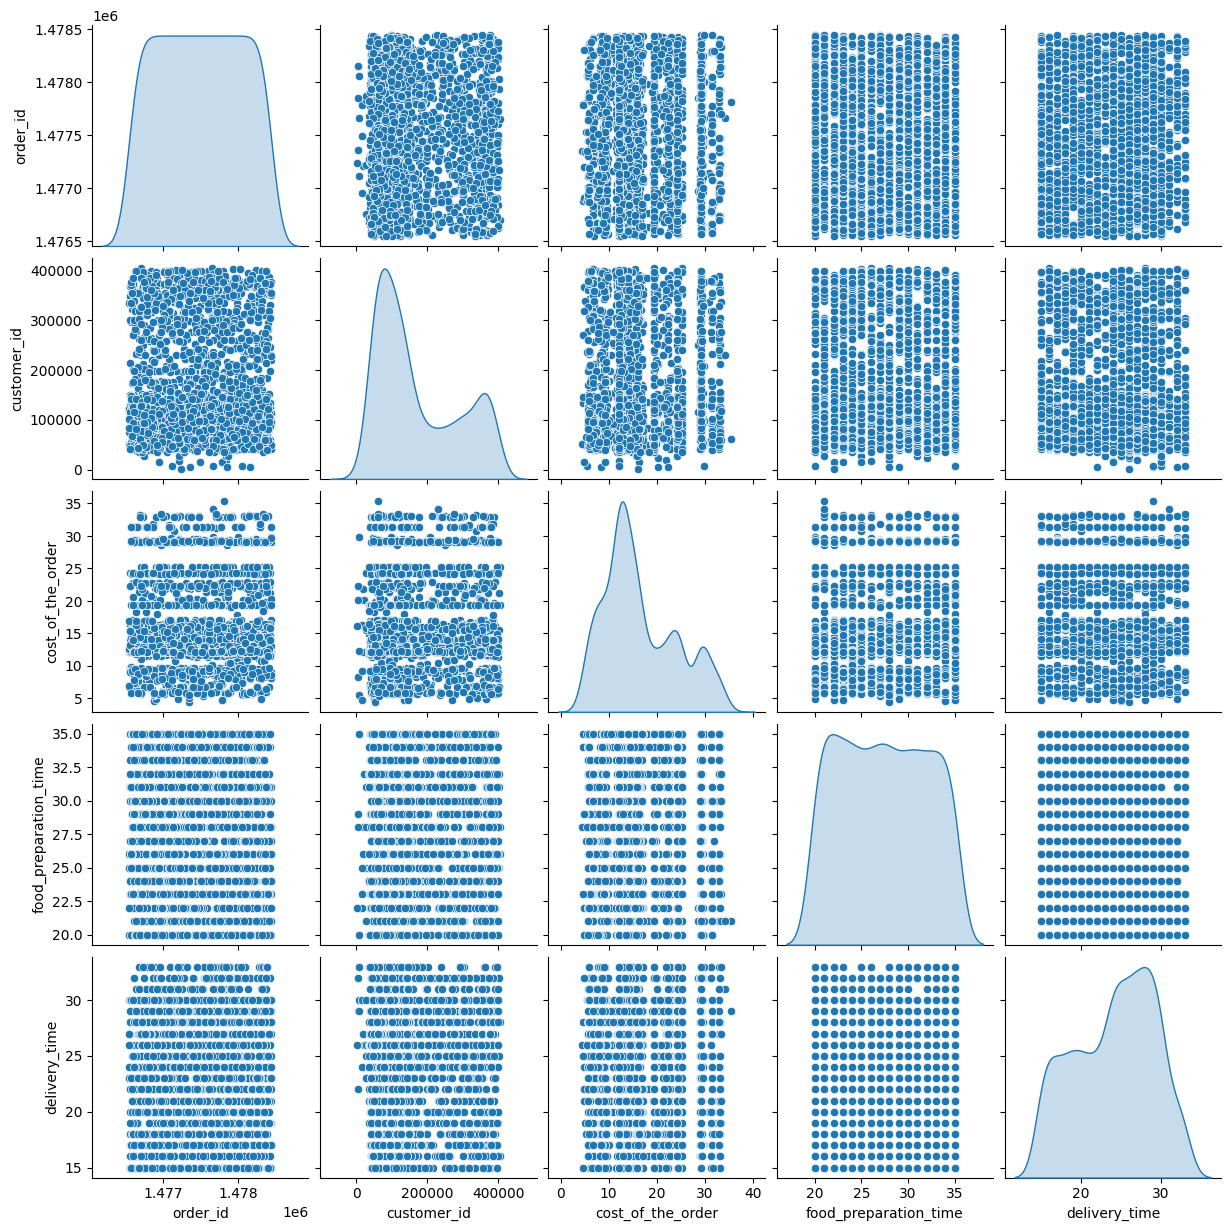

In [ ]:
sns.pairplot(data = df, diag_kind="kde")
plt.show();

#### Observations:

*   There is a very weak realtionship between the variables. Which means that as one variable changes, it does not necessarily show a predictable change in any other variables.






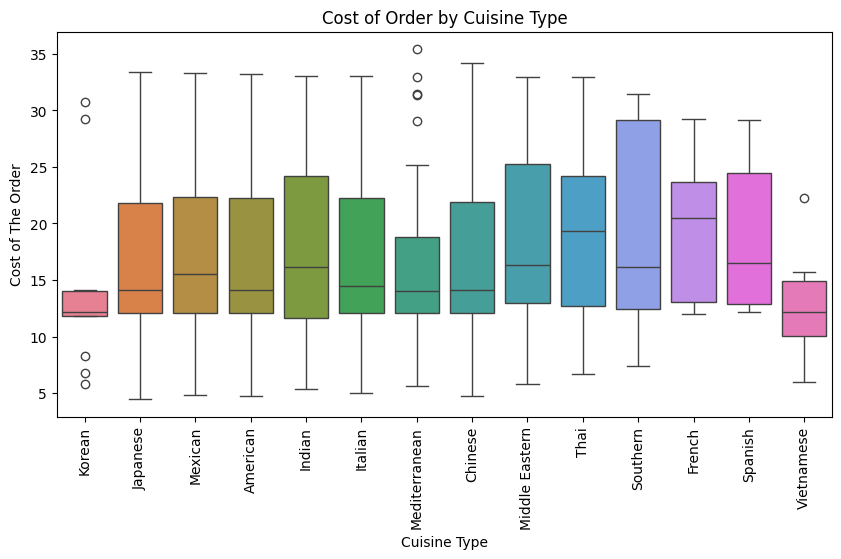

In [ ]:
plt.figure(figsize=(10,5))
plt.title ('Cost of Order by Cuisine Type')
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order', hue = 'cuisine_type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of The Order')
plt.xticks(rotation=90)
plt.show()

#### Observations:

*   The median cost of the French and Thai cuisines are much higher than those of other cuisine types.

*   There are outliers in the Korean, Mediterranean and Vietnamese cuisines, indicatiing significantly higher cost items as is the case for all three cuisine types and also lower cost items as in the case for the Korean cuisine.




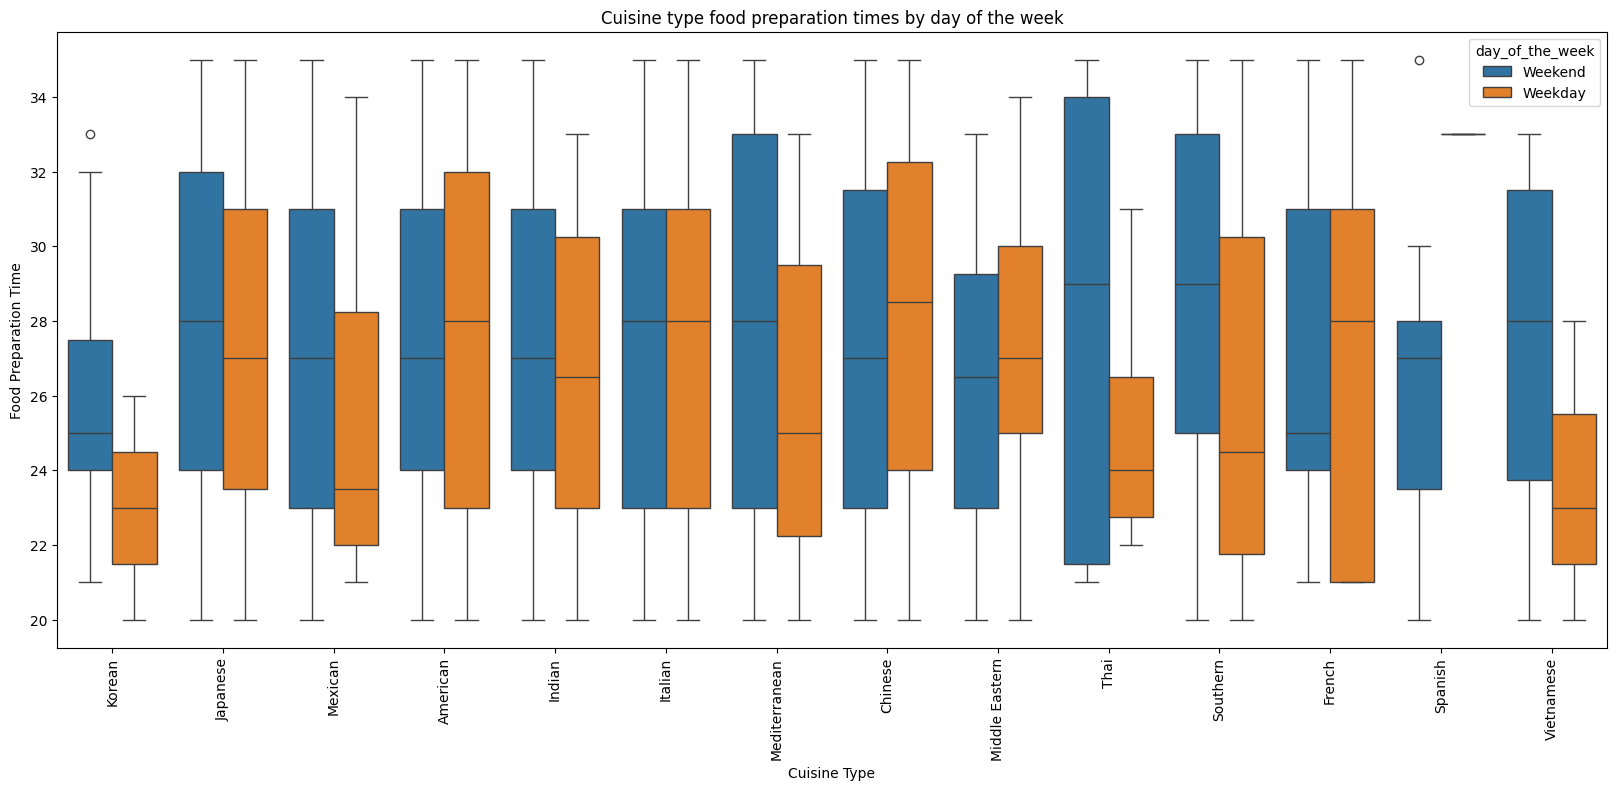

In [ ]:
plt.figure(figsize=(20,8))
plt.title ('Cuisine type food preparation times by day of the week')
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time', hue = 'day_of_the_week')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=90)
plt.show()

#### Observations:

From the graph it can be seen that the weekend preparation times on average for the weekend is higher than the weekdays for most of the cuisine types. The higher preparation time could also be due to higher volumes of orders on the weekends as mentioned above.

The interquartile range which is the height of the box is wider on weekends for most cuisines, suggesting more variability in preparation time during weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Filter out "Not given" ratings
df_rating = df[df['rating'] !='Not given'].copy()

# show restaurant with a rating count more than 50
df_rating_count= df_rating.groupby('restaurant_name')['rating'].count().sort_values(ascending= False).reset_index()

# Select the top restaurants with rating count more than 50
top_restaurants = df_rating_count[df_rating_count['rating'] > 50]

top_restaurants


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Calculate the average rating for the selected top restaurants
df_average_rating = df_rating[df_rating['restaurant_name'].isin(top_restaurants['restaurant_name'])]\
                    .groupby('restaurant_name')['rating']\
                    .mean()\
                    .sort_values()

# convert rating column to numeric typed
df_rating['rating'] = df_rating['rating'].astype(float)

# show the average rating for the top restaurants
print(df_average_rating)


restaurant_name
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
Blue Ribbon Fried Chicken    4.328125
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations:

*   The following restaurants, Blue Ribbon Sushi, Shake Shack, Blue Ribbon Fried Chicken and The Meatball Shop, should be provided a promotional offer in the advertisement of the restaurants, as they all meet the condition of having a rating count of more than 50 and an average rating greater than 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here

costs = df['cost_of_the_order']
revenue = 0

for cost in costs:
  if cost > 20:
    revenue += 0.25 * cost
  elif cost > 5:
    revenue += 0.15 * cost
  else:
     revenue += 0

# rounding the final amount
total_net_rev = round(revenue, 2)

print('The net revenue generated by the company across all orders is: $',total_net_rev, sep='')


The net revenue generated by the company across all orders is: $6166.3


Question above see saturday class for different method.

#### Observations:

*  The total revenue generated by the company across all orders is $6166.30, with the assumption that no other charges were applied to orders having cost less than 5 dollars






### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [ ]:
# create a copy to prevent modifying original table
df_copy = df.copy()

# find total time
df_copy['total_time'] = df_copy['food_preparation_time'] + df_copy['delivery_time']

#find total time greater than 60
df_greater_than_60 = df_copy[df_copy['total_time']>60]

#find percentage of total time over 60 minutes
df_percentage = round((df_greater_than_60.shape[0] / df_copy.shape[0]) * 100,2)

print('Percenatge of orders with total delivery time over 60 minutes is:', df_percentage,'%', sep='')

Percenatge of orders with total delivery time over 60 minutes is:10.54%


#### Observations:

* Approximately 11% of orders have total delivery time over 60 minutes, which means approximatley 89% of orders have a total delivery time of less than 60 minutes.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
round(df.groupby('day_of_the_week')['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:

*  The mean delivery time on the weekend is 22.47 compared to that of the weekday which is 28.34, indicating that it takes on average 6 minutes less for weekend deliveries compared to weekday deliveries.



In [ ]:
df.groupby('day_of_the_week')['order_id'].count()

day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*  The dataset contains 1,898 orders from 178 different restaurants offering 14 types of cuisines


*  The orders were approximatley 2.5 times more on weekends(1,351) than on weekdays(547).

*   The average cost of an order is 16.50 dollars, with order ranging from 4.47 dollars to 35.41 dollars, with the top 3 ordered cuisine types being American, Japanese and Italian and the least ordered cuisine types being Vietnamese, Korean and Spanish.

*   The most expensive cuisines on average are French and Thai, indicating a possible premium for these types of food.

*   Food preparation time, varies from 20 minutes to 35 minutes.  The average food preparation time was approximately 27.37 minutes, with 25% of the food preparation time taking over 31 minutes.

*   Delivery times average 24.16 minutes, with a range from 15 to 33 minutes.


*   For the ratings provided, the avergae rating is 4.34.  However, 736 orders do not have a rating provided and was not included when calculating the average rating values.








### Recommendations:

*  Ratings: Implement strategies to encourage customers to leave ratings, such as post-order incentives/discounts. This can provide more data for analysis and help improve service quality.

*   Cuisine Expansion: Given the higher average prices of French and Thai cuisines, consider expanding offerings in these categories to boost revenue.

*   Weekday Delivery Time: Investigate and address the causes of longer delivery times on weekdays. Solutions could include optimizing delivery routes or increasing staffing during peak times.

*   Customer Engagement: Increase customer engagement on weekdays through promotions or special offers to balance the order volume between weekends and weekdays.

*  Ratings: Develop a more robust system for collecting customer ratings to ensure a higher response rate. This could involve simplifying the rating process or sending reminders. Also Implementing strategies to encourage customers to leave ratings, such as order incentives. can help provide more data for analysis and help improve service quality.







---